In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pickle

In [3]:
car_data = pd.read_csv("cars24_row.csv", index_col=0)
car_data

,Car_name,Year,Distance,Fuel_type,Drive,Price
0,2018 Hyundai Creta SX 1.6 DIESEL DUAL TONE,2018,"65,357 KM",DIESEL,MANUAL,₹9.91 Lakh
1,2018 Honda Amaze 1.2L I-VTEC S OPT,2018,"50,840 KM",PETROL,MANUAL,₹4.51 Lakh
2,2019 Honda Amaze 1.2L I-VTEC V,2019,"32,255 KM",PETROL,MANUAL,₹6.17 Lakh
3,2016 Hyundai Creta SX PLUS 1.6 PETROL,2016,"60,817 KM",PETROL,MANUAL,₹9.51 Lakh
4,2014 Hyundai Santro Xing GLS PLUS AUDIO,2014,"74,647 KM",PETROL,MANUAL,₹2.80 Lakh
...,...,...,...,...,...,...
6428,2021 MG HECTOR SHARP 1.5 DCT PETROL,2021,"24,295 KM",PETROL,AUTOMATIC,₹15.05 Lakh\n₹16.89 Lakh\n(1.84L off)
6429,2022 Maruti Alto VXI,2022,"18,803 KM",PETROL,MANUAL,₹4.49 Lakh
6430,2021 Hyundai NEW I20 ASTA (O) 1.2 MT,2021,"32,965 KM",PETROL,MANUAL,₹7.68 Lakh
6431,2018 Maruti Wagon R 1.0 VXI,2018,"38,077 KM",PETROL,MANUAL,₹3.38 Lakh


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car_name   6433 non-null   object
 1   Year       6433 non-null   int64 
 2   Distance   6433 non-null   object
 3   Fuel_type  6433 non-null   object
 4   Drive      6433 non-null   object
 5   Price      6433 non-null   object
dtypes: int64(1), object(5)
memory usage: 351.8+ KB


In [5]:
car_data.describe().round(2)

,Year
count,6433.00
mean,2017.79
std,2.99
min,2010.00
25%,2016.00
50%,2018.00
75%,2020.00
max,2023.00


### Unique values for each column

In [6]:
for col_name in car_data.columns:
    print(col_name)
    print(f"{car_data[col_name].unique()}\n")

Car_name
['2018 Hyundai Creta SX 1.6 DIESEL DUAL TONE'
 '2018 Honda Amaze 1.2L I-VTEC S OPT' '2019 Honda Amaze 1.2L I-VTEC V' ...
 '2017 Datsun Redi Go GOLD LIMITED EDITION'
 '2019 Mahindra XUV300 W8(O) 1.2 PETROL DUAL TONE'
 '2021 Hyundai NEW I20 ASTA (O) 1.2 MT']

Year
[2018 2019 2016 2014 2012 2017 2015 2021 2022 2020 2013 2011 2023 2010]

Distance
['65,357 KM' '50,840 KM' '32,255 KM' ... '18,803 KM' '32,965 KM'
 '38,077 KM']

Fuel_type
['DIESEL' 'PETROL' 'CNG']

Drive
['MANUAL' 'AUTOMATIC']

Price
['₹9.91 Lakh' '₹4.51 Lakh' '₹6.17 Lakh' ...
 '₹4.48 Lakh\n₹4.94 Lakh\n(46k off)'
 '₹10.23 Lakh\n₹11.92 Lakh\n(1.69L off)'
 '₹15.05 Lakh\n₹16.89 Lakh\n(1.84L off)']



## Preprocessing need to be done on each column

### Car_name
- remove year from name
- for clean names keep first 3 words only

### Year
- convert from int64 to int16

### Distance
- remove KM from end
- remove comma(,)
- convert from object to int32

### Price
- fetch only first amount
- convert from object to float  ->  multiply by 100000 to make it lacs  ->  to int32

## Preprocessing

### Car_name

In [7]:
car_data["Car_name"] = [" ".join(name.split()[1:4]) for name in car_data["Car_name"]]
car_data.sample(4)

,Car_name,Year,Distance,Fuel_type,Drive,Price
6204,Mahindra XUV700 AX,2023,"18,513 KM",DIESEL,AUTOMATIC,₹26.24 Lakh
5394,Maruti Vitara Brezza,2020,"49,619 KM",PETROL,MANUAL,₹8.21 Lakh
3095,Honda City 1.5L,2015,"37,346 KM",PETROL,AUTOMATIC,₹6.12 Lakh\n₹6.67 Lakh\n(55k off)
2886,Honda WR-V 1.2L,2020,"33,856 KM",PETROL,MANUAL,₹7.85 Lakh\n₹8.48 Lakh\n(63k off)


### Year

In [8]:
car_data["Year"] = car_data["Year"].astype(dtype=np.int16)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car_name   6433 non-null   object
 1   Year       6433 non-null   int16 
 2   Distance   6433 non-null   object
 3   Fuel_type  6433 non-null   object
 4   Drive      6433 non-null   object
 5   Price      6433 non-null   object
dtypes: int16(1), object(5)
memory usage: 314.1+ KB


### Distance

In [9]:
car_data["Distance"] = [row.split(" ")[0].replace(",", "") for row in car_data["Distance"]]
car_data["Distance"] = car_data["Distance"].astype(int)
car_data.sample(4)

,Car_name,Year,Distance,Fuel_type,Drive,Price
3255,Hyundai Creta SX,2017,55424,DIESEL,MANUAL,₹9.26 Lakh\n₹9.74 Lakh\n(48k off)
2852,Mahindra XUV500 W6,2016,69972,DIESEL,MANUAL,₹8.80 Lakh\n₹9.18 Lakh\n(38k off)
2738,MG HECTOR SHARP,2020,36110,PETROL,AUTOMATIC,₹15.09 Lakh\n₹15.88 Lakh\n(79k off)
5402,Maruti IGNIS DELTA,2019,69689,PETROL,MANUAL,₹4.98 Lakh


In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car_name   6433 non-null   object
 1   Year       6433 non-null   int16 
 2   Distance   6433 non-null   int32 
 3   Fuel_type  6433 non-null   object
 4   Drive      6433 non-null   object
 5   Price      6433 non-null   object
dtypes: int16(1), int32(1), object(4)
memory usage: 289.0+ KB


### Price

In [11]:
car_data["Price"] = [price_row.split(" ")[0].replace("₹", "") for price_row in car_data["Price"]]
car_data["Price"] = car_data["Price"].astype(dtype=np.float64)
car_data.head(4)

,Car_name,Year,Distance,Fuel_type,Drive,Price
0,Hyundai Creta SX,2018,65357,DIESEL,MANUAL,9.91
1,Honda Amaze 1.2L,2018,50840,PETROL,MANUAL,4.51
2,Honda Amaze 1.2L,2019,32255,PETROL,MANUAL,6.17
3,Hyundai Creta SX,2016,60817,PETROL,MANUAL,9.51


In [12]:
car_data["Price"] = (car_data["Price"] * 100000).astype(dtype=np.int32)

In [13]:
car_data.head(4)

,Car_name,Year,Distance,Fuel_type,Drive,Price
0,Hyundai Creta SX,2018,65357,DIESEL,MANUAL,991000
1,Honda Amaze 1.2L,2018,50840,PETROL,MANUAL,451000
2,Honda Amaze 1.2L,2019,32255,PETROL,MANUAL,617000
3,Hyundai Creta SX,2016,60817,PETROL,MANUAL,951000


In [14]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car_name   6433 non-null   object
 1   Year       6433 non-null   int16 
 2   Distance   6433 non-null   int32 
 3   Fuel_type  6433 non-null   object
 4   Drive      6433 non-null   object
 5   Price      6433 non-null   int32 
dtypes: int16(1), int32(2), object(3)
memory usage: 263.9+ KB


##### We have bought memory usage almost half of when we statred

### Outliers

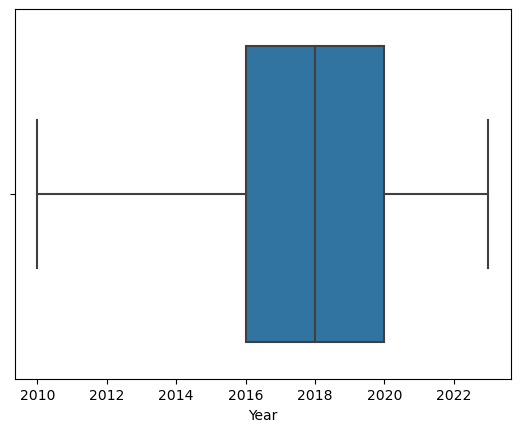

In [15]:
sns.boxplot(x=car_data["Year"])
plt.show()

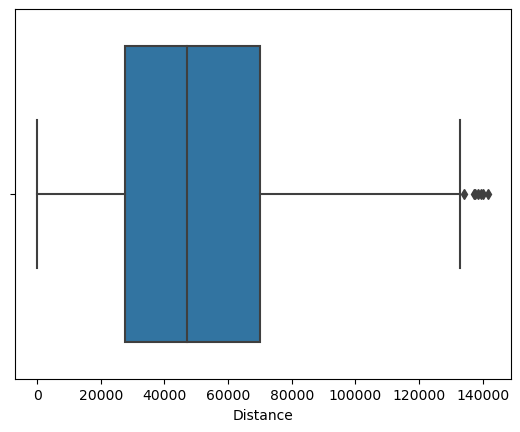

In [16]:
sns.boxplot(x=car_data["Distance"])
plt.show()

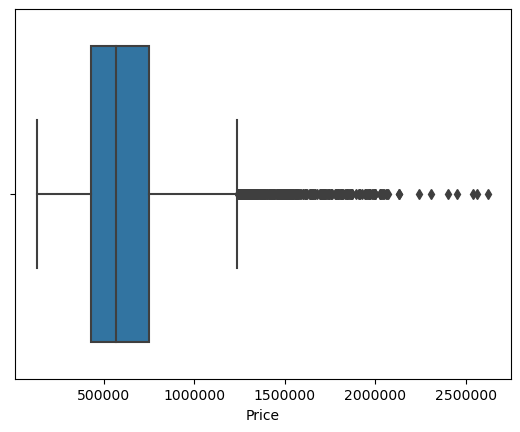

In [17]:
plt.ticklabel_format(style="plain")
sns.boxplot(x=car_data["Price"])
plt.show()

In [18]:
car_data = car_data[car_data["Price"] < 2250000].reset_index(drop=True)
car_data

,Car_name,Year,Distance,Fuel_type,Drive,Price
0,Hyundai Creta SX,2018,65357,DIESEL,MANUAL,991000
1,Honda Amaze 1.2L,2018,50840,PETROL,MANUAL,451000
2,Honda Amaze 1.2L,2019,32255,PETROL,MANUAL,617000
3,Hyundai Creta SX,2016,60817,PETROL,MANUAL,951000
4,Hyundai Santro Xing,2014,74647,PETROL,MANUAL,280000
...,...,...,...,...,...,...
6422,MG HECTOR SHARP,2021,24295,PETROL,AUTOMATIC,1505000
6423,Maruti Alto VXI,2022,18803,PETROL,MANUAL,449000
6424,Hyundai NEW I20,2021,32965,PETROL,MANUAL,768000
6425,Maruti Wagon R,2018,38077,PETROL,MANUAL,338000


In [19]:
car_data.to_csv("cars24_cleaned.csv")

##### Data is clean now and in desierd format to train model

## Model Training

### Saperating input and output columns

In [20]:
X = car_data.iloc[:, :-1]
Y = car_data.iloc[:, -1]

### Train test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=870)
x_train.shape, y_train.shape

((5141, 5), (5141,))

In [22]:
ohe = OneHotEncoder()
ohe.fit(X[["Car_name", "Fuel_type", "Drive"]])

OneHotEncoder()

### Transforming data
##### - converting car_name, fuel_type, drive into discrete
##### - Scaling year and Distance columns

In [23]:
trf1 = ColumnTransformer([
    ("ohe_name_fuel_drive", OneHotEncoder(categories=ohe.categories_), [0, 3, 4]),
    ("scaling_year_distance", StandardScaler(), [1, 2])
], remainder="passthrough")

### Training linear regression model

In [24]:
lr = LinearRegression()

### Creating Pipeline

In [25]:
pipe = Pipeline([
    ("trf1", trf1),
    ("lr", lr)
])

In [26]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_name_fuel_drive',
                                                  OneHotEncoder(categories=[array(['Datsun Go A', 'Datsun Go Plus', 'Datsun Go T', 'Datsun Go T(O)',
       'Datsun Redi Go', 'Ford Ecosport AMBIENTE',
       'Ford Ecosport TITANIUM', 'Ford Ecosport TITANIUM+',
       'Ford Ecosport TREND', 'Ford Ecosport TREND+',
       'Ford FREESTYLE TITANIUM', 'Ford FREES...
       'Volkswagen TIGUAN HIGHLINE', 'Volkswagen VIRTUS COMFORTLINE',
       'Volkswagen VIRTUS HIGHLINE', 'Volkswagen VIRTUS TOPLINE',
       'Volkswagen Vento COMFORTLINE', 'Volkswagen Vento HIGHLINE',
       'Volkswagen Vento TRENDLINE'], dtype=object),
                                                                            array(['CNG', 'DIESEL', 'PETROL'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL'], dtype=object)]),
                                                  [0, 3, 4]),
                                                 ('scaling_year_distance',
                                                  StandardScaler(), [1, 2])])),
                ('lr', LinearRegression())])

In [27]:
r2_score(y_test, pipe.predict(x_test))

0.921543538410505

In [28]:
# scores = []

# for i in range(1000):
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
#     lr = LinearRegression()
#     pipe = Pipeline([
#         ("trf1", trf1),
#         ("lr", lr)
#     ])
#     pipe.fit(x_train, y_train)
#     scores.append(r2_score(y_test, pipe.predict(x_test)))

# scores

In [29]:
pickle.dump(pipe, open("CarLinearRegressionModel.pkl", "wb"))